In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from time import time

In [5]:
col_names = ['Administrative','Administrative_Duration','Informational_Duration','ProductRelated','ProductRelated_Duration',
             'BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType_New_Visitor',
             'VisitorType_Returning_Visitor','VisitorType_Other','Weekend','Revenue','Y']
# load datasetSex
data = pd.read_csv("OSI_data_v2.csv", header=None, names=col_names)

In [6]:
data.head()

,Administrative,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Returning_Visitor,VisitorType_Other,Weekend,Revenue,Y
0,0,0.0,0.0,0,0.0,0.18,0.181818,0.0,0.0,6,2,2,7,6,0,1,0,0,0,0
1,0,0.0,0.0,0,0.0,0.20,0.200000,0.0,0.0,11,1,1,8,8,0,1,0,0,0,0
2,0,0.0,0.0,0,0.0,0.20,0.200000,0.0,0.0,11,1,1,9,2,0,1,0,0,0,0
3,0,0.0,0.0,0,0.0,0.20,0.200000,0.0,0.0,11,1,1,9,3,0,1,0,0,0,0
4,0,0.0,0.0,0,0.0,0.20,0.200000,0.0,0.0,5,2,2,8,3,0,1,0,0,0,0


In [7]:
from tkinter import Y
feature_cols = ['Administrative','Administrative_Duration','Informational_Duration','ProductRelated','ProductRelated_Duration',
             'BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType_New_Visitor',
             'VisitorType_Returning_Visitor','VisitorType_Other','Weekend','Revenue','Y']
X = data[feature_cols] # Features
y = data.Y # Target variable
y

0        0
1        0
2        0
3        0
4        0
        ..
12325    1
12326    0
12327    0
12328    3
12329    1
Name: Y, Length: 12330, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
X_train.shape

(9247, 20)

In [10]:
#Purity計算
def Purity(Cluster,ClassData):
    cSet=[]
    for c in range(0,len(Cluster)):
        isNotSave=True
        for cs in range(0,len(cSet)):
            if(cSet[cs]==Cluster[c]):
                isNotSave=False
                break
        if(isNotSave):
            cSet.append(Cluster[c])
    classSet=[]
    for a in range(0,len(ClassData)):
        isNotSave=True
        for cs in range(0,len(classSet)):
            if(classSet[cs]==ClassData[a]):
                isNotSave=False
                break
        if(isNotSave):
            classSet.append(ClassData[a])
    cCount=[]
    for cs in range(0,len(cSet)):
        classCount=[]
        for c in range (0,len(classSet)):
            classCount.append(0)
        for cl in range(0,len(Cluster)):
            if(cSet[cs]==Cluster[cl]):
                for c in range (0,len(classSet)):
                    if(ClassData[cl]==classSet[c]):
                        classCount[c]+=1
                        break;
        cCount.append(classCount)
    rowCount=[]
    maxCount=[]
    for c in range(0,len(cCount)):
        rowCount.append(0)
        maxCount.append(0)
    sumCount=0
    for c in range(0,len(cCount)):
        for r in range(0,len(cCount[c])):
            rowCount[c]+=cCount[c][r]
            sumCount+=cCount[c][r]
            if(maxCount[c]<cCount[c][r]):
                maxCount[c]=cCount[c][r]
    
    avg=0
    for a in range(0,len(rowCount)):
        avg+=(maxCount[a]/rowCount[a])*(rowCount[a]/sumCount)
    return str(avg)

In [11]:
# def mode(a):
#     counts = np.bincount(a)  
#     return np.argmax(counts)

In [12]:
#silhouette_score
from sklearn import cluster
from sklearn.metrics import silhouette_score
# KMeans

pred_kmean = cluster.KMeans(n_clusters = 3,algorithm="elkan")
pred_kmean.fit_predict(X_test)

pred_labels = pred_kmean.labels_

score = silhouette_score(X_test, pred_labels, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.684


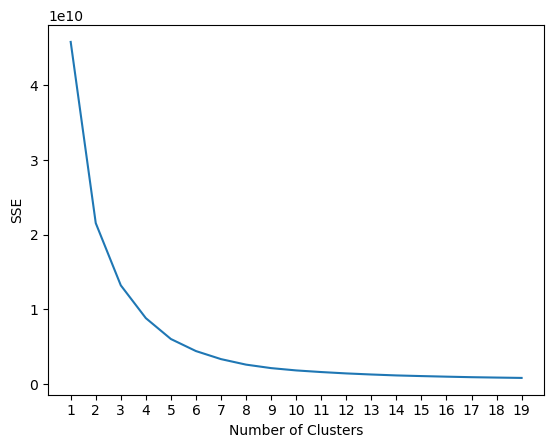

In [13]:
#sse
sse= []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Purity: 1.0
分群結果：
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]
---
真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


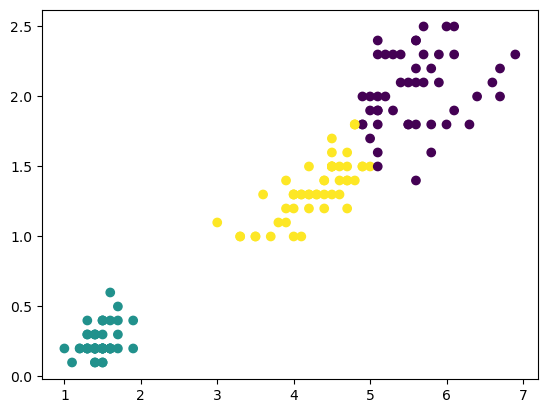

In [14]:
from sklearn import cluster, datasets

# 讀入鳶尾花資料
osi = datasets.load_iris()
X = osi.data
X=X[:,2:4]

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(X)
t= time()
kmeans_fit.fit_predict(X)
c=kmeans_fit.fit_predict(X)
yArray=[]
for yy in y:
    yArray.append(yy)
purity = Purity(c,yArray)
print('Purity:', purity)

# 印出分群結果
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = osi.target
print("真實品種：")
print(iris_y)


plt.scatter(X[:,0],X[:,1],c=kmeans_fit.predict(X))

In [15]:
from sklearn import cluster, datasets, metrics


# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(X)
cluster_labels = kmeans_fit.labels_

# 印出績效
silhouette_avg = metrics.silhouette_score(X, cluster_labels)
print(silhouette_avg)


0.6604800083974887


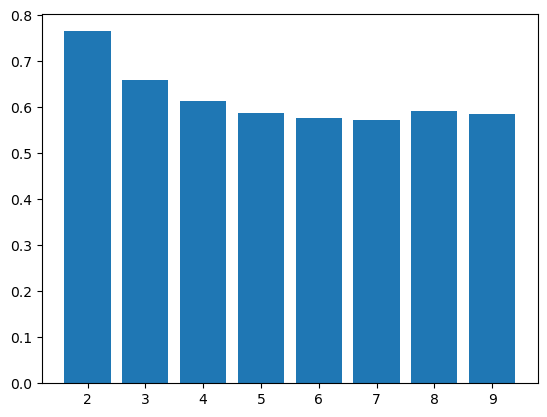

[0.7653904101258123, 0.6604800083974887, 0.6127580794464402, 0.5883732712110276, 0.5769601940397073, 0.5726638363764566, 0.5918796890703468, 0.5863713899381878]


In [16]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

# 迴圈
silhouette_avgs = []
ks = range(2, 10)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)